In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Understanding the Dataset

In [3]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [6]:
train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


We can understand that we have to predict the values of column 'num_orders' for the test data. 

#### Checking for Null Values

In [8]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [9]:
test.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
dtype: int64

This shows that the train and test datasets are not having the null values

#### Merging the mean_info.csv and center_info.csv datasets

This step can help us to select other necessary features for the prediction of the number of orders and thus knowing the demand

In [10]:
info_meal = pd.read_csv("meal_info.csv")
info_center = pd.read_csv("fulfilment_center_info.csv")

In [11]:
info_meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [12]:
info_center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [13]:
train_f  = pd.merge(train,info_meal,on = 'meal_id',how = 'outer')
train_f = pd.merge(train_f,info_center, on = 'center_id', how = 'outer')

In [14]:
train_f.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


#### Droping columns

This steps removes the features from the dataset which do not contribute in prediction of number of orders.
We can observe that mean id and center id don't affect the number of orders. Hence we will drop those columns

In [15]:
train_f = train_f.drop(['center_id','meal_id'],axis = 'columns')
train_f.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


Reordering Columns

In [16]:
cols = train_f.columns.to_list()
cols

['id',
 'week',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'num_orders',
 'category',
 'cuisine',
 'city_code',
 'region_code',
 'center_type',
 'op_area']

In [17]:
cols = cols[:2] + cols[9:] + cols[7:9] + cols[2:7]
print(cols)

['id', 'week', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


In [18]:
train_f = train_f[cols]
train_f.dtypes

id                         int64
week                       int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

After meging the datasets, we can observe that we also have object type dataset along with numerical data. So we need to convert the object type data to numerical data for better analysis using label encoding

In [19]:
le_cntr_typ = LabelEncoder()
le_ctgry = LabelEncoder()
le_cusine = LabelEncoder()

In [20]:
train_f['center_type'] = le_cntr_typ.fit_transform(train_f['center_type'])
train_f['category'] = le_ctgry.fit_transform(train_f['category'])
train_f['cuisine'] = le_cusine.fit_transform(train_f['cuisine'])

In [21]:
train_f.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,647,56,2,2.0,0,3,136.83,152.29,0,0,177
1,1018704,2,647,56,2,2.0,0,3,135.83,152.29,0,0,323
2,1196273,3,647,56,2,2.0,0,3,132.92,133.92,0,0,96
3,1116527,4,647,56,2,2.0,0,3,135.86,134.86,0,0,163
4,1343872,5,647,56,2,2.0,0,3,146.50,147.50,0,0,215


In [22]:
train_f.shape

(456548, 13)

Visualising data: 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'num_order distribution')

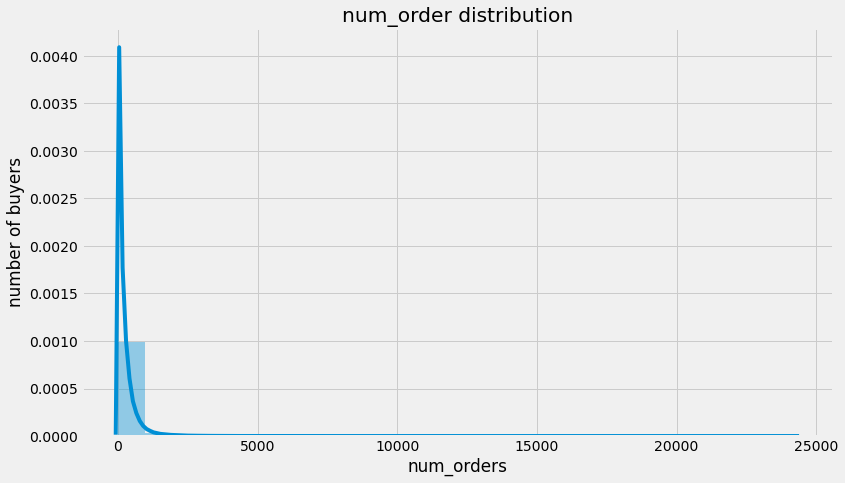

In [25]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,7))
sns.distplot(train_f.num_orders,bins = 25)
plt.xlabel('num_orders')
plt.ylabel('number of buyers')
plt.title('num_order distribution')

In [26]:
bin_width = max(train['num_orders'])/25
bin_width

971.96

In [27]:
n = train['num_orders'] < 972
print('no of customers in the bin with orders less than 972 (bin with max freq from the above graph): ' + str(n.sum()))
print('Total number of customers: ' + str(len(train)))

no of customers in the bin with orders less than 972 (bin with max freq from the above graph): 437954
Total number of customers: 456548


Majority of the buyers are found having the number of orders between 0 and 972 

In [28]:
train_f2 = train_f.drop(['id'],axis = 'columns')
corr = train_f2.corr(method = 'pearson')
columns = corr.nlargest(8,'num_orders').index
columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category'],
      dtype='object')

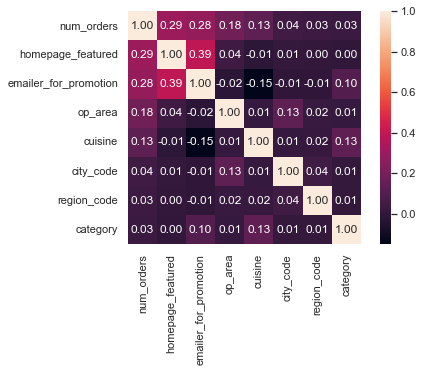

In [29]:
corr_map = np.corrcoef(train_f2[columns].values.T)
sns.set(font_scale = 1)
heat_map = sns.heatmap(corr_map,cbar = True, annot = True, square = True, fmt = '.2f', yticklabels = columns.values, xticklabels = columns.values)

We can observe that, num_orders is more likely to get affected by featuring homepage and having an emailer for promotions. In the top 7 columns which affect the number of orders positively are: homepage_featured, emailer_for_promotion, op_area, cuisine, city_code, region_code and category (i.e. type of food ordered, eg: beverage)

### Getting Ready for applying algorithms of ML

In [30]:
# num_orders - > dependent variable
# other top 7 rows having the max correlation with the num_orders -> independent variables

features = columns.drop(['num_orders'])
train_f3 = train_f[features]
X = train_f3.values
y = train_f['num_orders'].values

In [31]:
train_f3.head()

,homepage_featured,emailer_for_promotion,op_area,cuisine,city_code,region_code,category
0,0,0,2.0,3,647,56,0
1,0,0,2.0,3,647,56,0
2,0,0,2.0,3,647,56,0
3,0,0,2.0,3,647,56,0
4,0,0,2.0,3,647,56,0


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.25)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics

In [34]:
XG = XGBRegressor()
XG.fit(X_train,y_train)
y_pred = XG.predict(X_val)
y_pred[y_pred<0] = 0
print('RMSLE: ',100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))

RMSLE:  69.31095160365177


In [35]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_val)
y_pred[y_pred<0] = 0
print('RMSLE: ',100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))


RMSLE:  130.06017926220323


In [36]:
L = Lasso()
L.fit(X_train,y_train)
y_pred = L.predict(X_val)
y_pred[y_pred<0] = 0
print('RMSLE: ',100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))

RMSLE:  129.54616967084834


In [37]:
EN = ElasticNet()
EN.fit(X_train,y_train)
y_pred = EN.predict(X_val)
y_pred[y_pred<0] = 0
print('RMSLE: ',100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))

RMSLE:  130.8228577383755


In [38]:
DT = DecisionTreeRegressor()
DT.fit(X_train,y_train)
y_pred = DT.predict(X_val)
y_pred[y_pred<0] = 0
print('RMSLE: ',100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))

RMSLE:  62.800829139673844


In [39]:
KNN = KNeighborsRegressor()
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_val)
y_pred[y_pred<0] = 0
print('RMSLE: ',100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))

RMSLE:  67.31920287931584


In [40]:
GB = GradientBoostingRegressor()
GB.fit(X_train,y_train)
y_pred = GB.predict(X_val)
y_pred[y_pred<0] = 0
print('RMSLE: ',100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))

RMSLE:  99.1294821118241


By observation, Decission tree regressor is giving the least Root mean square log error. Hence, we will use decision tree as our model to predict the values

In [41]:
pickle.dump(DT,open('fdemand.pkl','wb'))

### Prediction
Preparing the test dataset

In [42]:
test_f  = pd.merge(test,info_meal,on = 'meal_id',how = 'outer')
test_f = pd.merge(test_f,info_center, on = 'center_id', how = 'outer')
test_f.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1262649,147,55,1885,159.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1453211,149,55,1885,157.14,158.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,1262599,150,55,1885,159.14,157.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
4,1495848,151,55,1885,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0


In [43]:
test_f = test_f.drop(['center_id','meal_id'],axis = 'columns')
test_f.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1262649,147,159.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1453211,149,157.14,158.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,1262599,150,159.14,157.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
4,1495848,151,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0


In [44]:
t_cols = test_f.columns.to_list()
print(t_cols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


In [45]:
t_cols = t_cols[:2] + t_cols[8:] + t_cols[6:8] + t_cols[2:6]
print(t_cols)

['id', 'week', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']


In [46]:
test_f = test_f[t_cols]

In [47]:
le_cntr_typ = LabelEncoder()
le_ctgry = LabelEncoder()
le_cusine = LabelEncoder()

test_f['center_type'] = le_cntr_typ.fit_transform(test_f['center_type'])
test_f['category'] = le_ctgry.fit_transform(test_f['category'])
test_f['cuisine'] = le_cusine.fit_transform(test_f['cuisine'])

In [48]:
test_f.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,647,56,2,2.0,0,3,158.11,159.11,0,0
1,1262649,147,647,56,2,2.0,0,3,159.11,159.11,0,0
2,1453211,149,647,56,2,2.0,0,3,157.14,158.14,0,0
3,1262599,150,647,56,2,2.0,0,3,159.14,157.14,0,0
4,1495848,151,647,56,2,2.0,0,3,160.11,159.11,0,0


In [49]:
X_test = test_f[features].values

In [50]:
pred = DT.predict(X_test)
pred[pred<0] = 0

In [51]:
submit = pd.DataFrame({ 'id' : test_f['id'],'num_orders' : pred })

In [52]:
submit.head()

,id,num_orders
0,1028232,206.977492
1,1262649,206.977492
2,1453211,206.977492
3,1262599,206.977492
4,1495848,206.977492


In [53]:
submit.describe()

,id,num_orders
count,3.257300e+04,32573.000000
mean,1.248476e+06,262.574568
std,1.441580e+05,364.233521
min,1.000085e+06,14.333333
25%,1.123969e+06,64.381323
50%,1.247296e+06,146.681452
75%,1.372971e+06,323.873720
max,1.499996e+06,6311.470588


In [54]:
submit.to_excel('submission.xlsx')